<a href="https://colab.research.google.com/github/velnata/Major-Project/blob/main/MajorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#warnings
import warnings
warnings.filterwarnings('ignore')



In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Data collection and importing

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/train.csv')

In [4]:
data.shape

(38932, 5)

In [5]:
data.head(5)

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [6]:
count = data.isnull().sum().sort_values(ascending=False)
percentage = ((data.isnull().sum()/len(data)*100)).sort_values(ascending=False)
missing_data = pd.concat([count,percentage], axis=1,
                         keys=['Count','Percentage'])

print('Count and Percentage of missing values for the columns: ')

missing_data


Count and Percentage of missing values for the columns: 


,Count,Percentage
Is_Response,0,0.0
Device_Used,0,0.0
Browser_Used,0,0.0
Description,0,0.0
User_ID,0,0.0


Percentage for default

happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


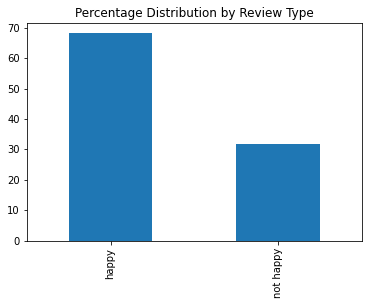

In [7]:
## Checking for the distribution of Default
import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default\n')
print(round(data.Is_Response.value_counts(normalize=True)*100,2))
round(data.Is_Response.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distribution by Review Type')
plt.show()

In [8]:
#Removing Columns
data.drop(columns=['User_ID','Browser_Used','Device_Used'], inplace = True)

Cleaning the data

In [9]:
import re
import string

def text_clean_1(text):
  text = text.lower()
  text = re.sub('\[.*?\]','',text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '',text)
  text = re.sub('\w*\d\w*', '',text)
  return text

cleaned1=lambda x: text_clean_1(x)

In [10]:
data['cleaned_description'] = pd.DataFrame(data.Description.apply(cleaned1))
data.head(10)

,Description,Is_Response,cleaned_description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...


In [11]:
#one more time we shall clean
def text_clean_2(text):
  text = re.sub('[''""...]', '', text)
  text = re.sub('\n', '',text)
  return text

cleaned2=lambda x: text_clean_2(x)

In [12]:
data['cleaned_description_new'] = pd.DataFrame(data['cleaned_description'].apply(cleaned2))
data.head(10)

,Description,Is_Response,cleaned_description,cleaned_description_new
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...,wonderful staff great location but it was defi...


Model Training

In [13]:
from sklearn.model_selection import train_test_split

Independent_var = data.cleaned_description_new
Dependent_var = data.Is_Response

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.1, random_state= 225)

print('IV_train:', len(IV_train))
print('IV_test:', len(IV_test))
print('DV_train:', len(DV_train))
print('DV_test:', len(DV_test))

IV_train: 35038
IV_test: 3894
DV_train: 35038
DV_test: 3894


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = 'lbfgs')

from sklearn.pipeline import Pipeline

In [15]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])
model.fit(IV_train, DV_train)

from sklearn.metrics import confusion_matrix
predictions = model.predict(IV_test)
confusion_matrix(predictions, DV_test)

array([[2417,  304],
       [ 154, 1019]])

Model Prediction

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average='weighted'))

Accuracy :  0.8823831535695943
Precision :  0.8889271415963718
Recall :  0.8823831535695943


Testing new reviews

In [17]:
test1 = ["I'm happy" ]
result = model.predict(test1)

print(result)

['happy']


Deployment in Web App(Streamlit)

In [36]:
!pip install pyngrok

In [ ]:
!pip install streamlit

In [33]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

df=pd.read_table('/content/train.csv')
x =df.iloc[:,1].values #Message input
y = df.ilox[:,0].values#output message
st.title('Sentiment Analysis of Hotel-Review')
st.subheader('TFIDF Vectorization')
st.write('This project is based on Logistic Regression')

model = Pipeline([('vectorizer',tvec),('classifier',clf2)])
model.fit(IV_train, DV_train)
message= st.text_area("Enter the text")
op = model.predict([message])
if st.button("Predict"):
  st.title(op)

Overwriting app.py


In [37]:
from pyngrok import ngrok
url = ngrok.connect(port='8051')
url